In [7]:
# ==============================================================================
# Cell 1: Imports & Setup
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import re

# Define Paths
PROCESSED_DATA_PATH = '../data/processed'
OUTPUT_PATH = '../output'
FIGURES_PATH = '../output/figures'

# Ensure output directories exist
os.makedirs(FIGURES_PATH, exist_ok=True)

print("✅ Libraries imported and paths set.")

✅ Libraries imported and paths set.


In [3]:
# ==============================================================================
# Cell 2: Load Data (Merge Phase 2 & Phase 3)
# ==============================================================================
# Load the community map (Artist -> Community ID)
comm_path = os.path.join(PROCESSED_DATA_PATH, 'artist_communities.csv')
df_communities = pd.read_csv(comm_path)

# Load the topic data (Song -> Dominant Topic)
topic_path = os.path.join(PROCESSED_DATA_PATH, 'song_topics.csv')
df_topics = pd.read_csv(topic_path)

print(f"Loaded communities for {len(df_communities)} artists.")
print(f"Loaded topics for {len(df_topics)} songs.")

# Merge them!
# We want to know the Community of the artist who made each song.
df_merged = pd.merge(df_topics, df_communities, left_on='artist', right_on='Artist', how='inner')

print(f"\nMerged Dataset Size: {len(df_merged)} songs")
print(df_merged[['artist', 'title', 'Dominant_Topic', 'Community_ID']].head())

Loaded communities for 51 artists.
Loaded topics for 150 songs.

Merged Dataset Size: 150 songs
    artist           title  Dominant_Topic  Community_ID
0  J. Cole  No Role Modelz               3             0
1  J. Cole       She Knows               2             0
2  J. Cole      Power Trip               0             0
3  J. Cole      Wet Dreamz               0             0
4  J. Cole      Love Yourz               3             0



--- Topic Distribution by Community (Percentage) ---
Dominant_Topic         0         1         2         3         4
Community_ID                                                    
0               0.300000  0.033333  0.433333  0.166667  0.066667
1               0.100000  0.100000  0.400000  0.233333  0.166667
2               0.466667  0.300000  0.133333  0.033333  0.066667
3               0.200000  0.133333  0.300000  0.066667  0.300000
4               0.333333  0.133333  0.233333  0.133333  0.166667

✅ Heatmap saved to: ../output/figures/community_topic_heatmap.png


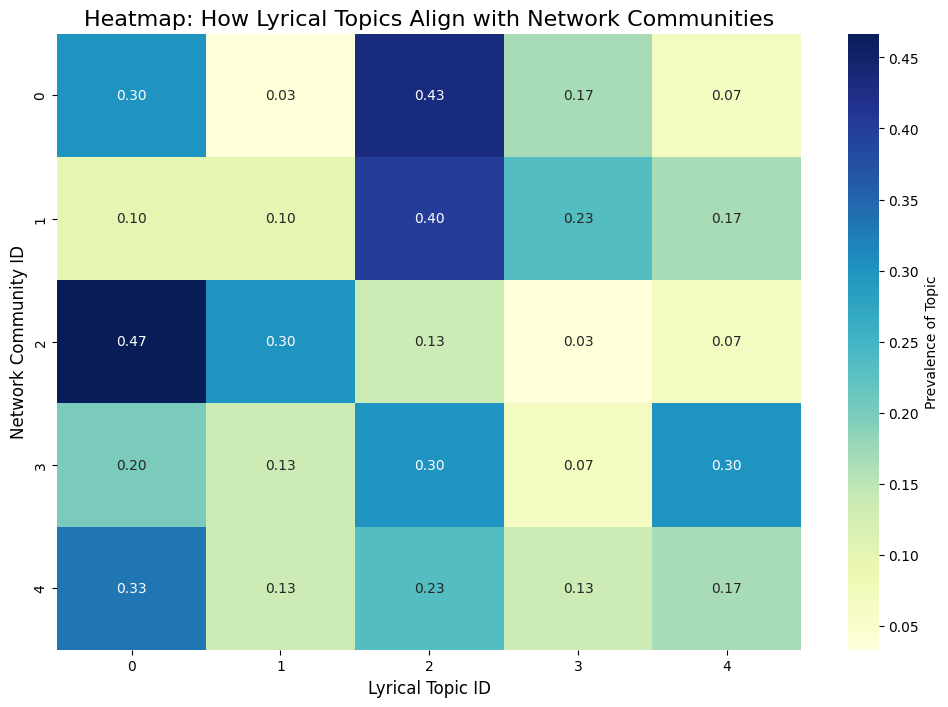

In [4]:
# ==============================================================================
# Cell 3: Analysis - Community vs. Topic (The "Money" Chart)
# ==============================================================================
# We want to see the distribution of topics WITHIN each community.

# Create a crosstab (contingency table)
# Rows = Communities, Columns = Topics, Values = Count of songs
topic_dist = pd.crosstab(df_merged['Community_ID'], df_merged['Dominant_Topic'], normalize='index')

print("\n--- Topic Distribution by Community (Percentage) ---")
print(topic_dist)

# Visualize as a Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(topic_dist, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Prevalence of Topic'})
plt.title('Heatmap: How Lyrical Topics Align with Network Communities', fontsize=16)
plt.ylabel('Network Community ID', fontsize=12)
plt.xlabel('Lyrical Topic ID', fontsize=12)

# Save the heatmap
heatmap_path = os.path.join(FIGURES_PATH, 'community_topic_heatmap.png')
plt.savefig(heatmap_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Heatmap saved to: {heatmap_path}")
plt.show()

In [5]:
# ==============================================================================
# Cell 4: Statistical Validation
# ==============================================================================
# Is this distribution random, or is there a real relationship?
# We can use a Chi-Squared test to find out.

from scipy.stats import chi2_contingency

# Create the raw count table (not normalized) for the test
contingency_table = pd.crosstab(df_merged['Community_ID'], df_merged['Dominant_Topic'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n--- Chi-Squared Test Results ---")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4e}") # Scientific notation

if p < 0.05:
    print("✅ RESULT: Statistically Significant (p < 0.05)")
    print("   There IS a strong relationship between an artist's social community and their lyrical content.")
else:
    print("❌ RESULT: Not Statistically Significant (p >= 0.05)")
    print("   We could not prove a strong link between community and topic.")


--- Chi-Squared Test Results ---
Chi2 Statistic: 35.7412
P-Value: 3.1426e-03
✅ RESULT: Statistically Significant (p < 0.05)
   There IS a strong relationship between an artist's social community and their lyrical content.


In [8]:
# ==============================================================================
# Cell 5: Interpretation Helper
# ==============================================================================
# Let's print the top words for each topic again to help you label the heatmap.
# You'll need to load the LDA model first (or just copy-paste from Phase 3 output).

import gensim
model_path = os.path.join('../output/models', 'lda_model')

try:
    lda_model = gensim.models.LdaMulticore.load(model_path)
    print("\n--- Topic Reference Guide ---")
    for idx, topic in lda_model.print_topics(-1):
        # Clean up the string for easier reading
        clean_topic = re.sub(r'0\.\d+\*', '', topic).replace(' + ', ', ').replace('"', '')
        print(f"Topic {idx}: {clean_topic}")
except Exception as e:
    print(f"Could not load model for reference (not critical): {e}")
    print("Refer to your Phase 3 notebook output for topic keywords.")


--- Topic Reference Guide ---
Topic 0: count, still, put, type, money, bout, need, woo, talk, as
Topic 1: fuckin, mask, ayy, need, chase, big, yall, god, hand, started
Topic 2: look, god, gotta, turn, real, give, girl, come, run, hundred
Topic 3: dope, young, move, hold, life, ayy, think, sellin, thing, black
Topic 4: life, low, high, feel, real, much, money, girl, right, alright
